In [1]:
import os
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage import color
from skimage.filters import threshold_otsu
from skimage.transform import resize

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  precision_score, recall_score, ConfusionMatrixDisplay

from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

from skimage.color import rgb2gray

from sklearn.ensemble import HistGradientBoostingClassifier as gb
from sklearn.naive_bayes import GaussianNB

In [2]:
datadir = 'D:\\py\\project\\UJI_3\\augmentasi\\dataset_aug'
flat_data_arr = []
labels = []

images = [images for images in os.listdir(datadir)]

for category in images:
    print(f"Loading Category {category}")
    path = os.path.join(datadir, category)
    for image in os.listdir(path):
        path_image = os.path.join(path, image)
        img_array = imread(path_image)

        # convert to grayscale
        img_gray = color.rgb2gray(img_array)

        # Use Otsu's method for global thresholding
        threshold_value = threshold_otsu(img_gray)
        segmented_image = img_gray > threshold_value

        # Resize the segmented image to a desired size (e.g., 128x128)
        image_resize = resize(segmented_image, (64, 64))

        flat_data_arr.append(image_resize.flatten())
        labels.append(images.index(category))

    print(f"Loaded category {category} successfully")


    flat_data_arr[0]

Loading Category Anthracnose
Loaded category Anthracnose successfully
Loading Category BacterialSpot
Loaded category BacterialSpot successfully
Loading Category Curl
Loaded category Curl successfully
Loading Category Healthy
Loaded category Healthy successfully
Loading Category RingSpot
Loaded category RingSpot successfully


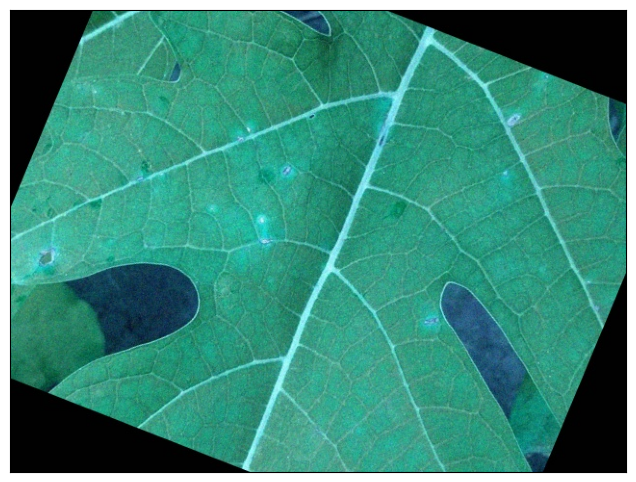

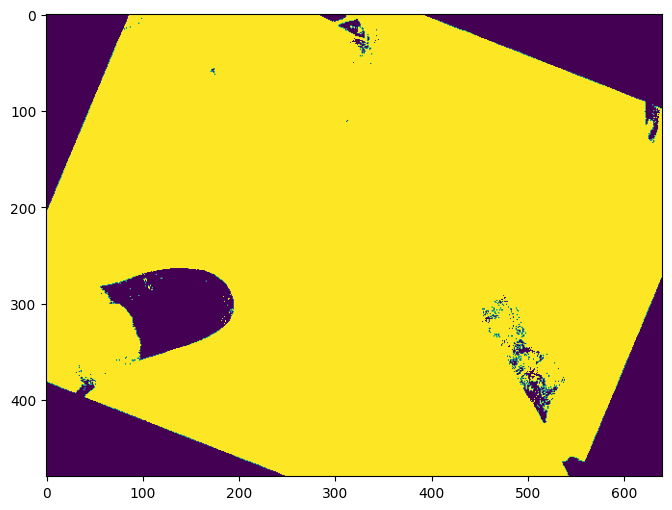

In [3]:
# gray
plt.figure(figsize=(8, 6))
plt.imshow(img_array)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# segmented
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image)
plt.show()


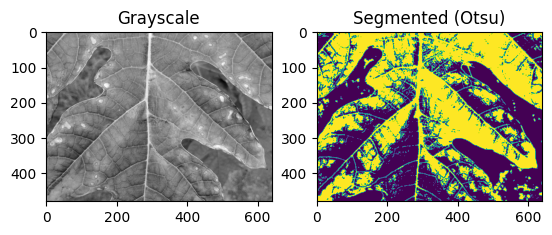

In [4]:
img = imread('D:\\py\\project\\UJI_3\\augmentasi\\dataset_tanpa_augmentasi\\RingSpot\\RingSpot(361).jpg')
gray = rgb2gray(img)

thresh = threshold_otsu(gray)
binary = gray > thresh  # segmentasi daun

plt.subplot(1,2,1); plt.imshow(gray, cmap='gray'); plt.title("Grayscale")
plt.subplot(1,2,2); plt.imshow(binary); plt.title("Segmented (Otsu)")
plt.show()

In [5]:
# Convert data to numpy arrays
flat_data = np.array(flat_data_arr)
target = np.array(labels)

# Create a DataFrame for the data
df = pd.DataFrame(flat_data)
df['Target'] = target

df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Target
0,True,True,True,False,True,False,False,False,False,False,...,True,True,False,False,False,False,False,True,True,0
1,False,True,False,True,False,True,True,False,False,False,...,True,False,False,False,False,True,True,True,False,0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
8632,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,4
8633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
8634,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4


In [6]:
new_df = df.drop_duplicates()
new_df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Target
0,True,True,True,False,True,False,False,False,False,False,...,True,True,False,False,False,False,False,True,True,0
1,False,True,False,True,False,True,True,False,False,False,...,True,False,False,False,False,True,True,True,False,0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
8632,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,4
8633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
8634,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4


In [7]:
# Split the data into training and testing sets
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

# minMax = MinMaxScaler()
# minMaxSc = minMax.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X.shape)
print(y.shape)

(8558, 4096)
(8558,)


The model is 28.329439252336446% accurate
              precision    recall  f1-score   support

           0       0.24      0.25      0.24       271
           1       0.22      0.21      0.22       375
           2       0.27      0.31      0.29       410
           3       0.16      0.18      0.17       155
           4       0.44      0.37      0.40       501

    accuracy                           0.28      1712
   macro avg       0.26      0.26      0.26      1712
weighted avg       0.29      0.28      0.29      1712

Accuracy: 28.33 %
Precision: 29.28 %
Recall: 28.33 %
TrainingAccuracy: 93.16 %


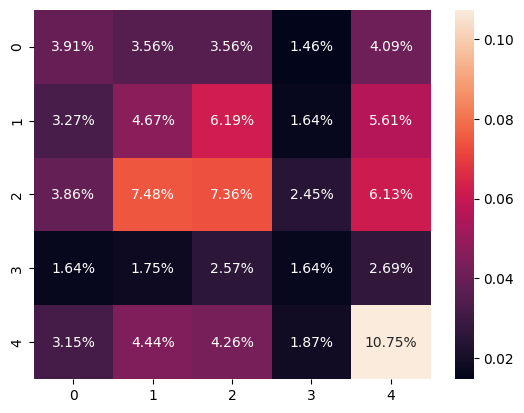

In [8]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier



dtc=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=25, min_samples_split=2, min_samples_leaf=1,
                           min_weight_fraction_leaf=0.0,max_features=None, random_state=None,
                           max_leaf_nodes=None,  min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
'''print("The predicted Data is :")
print(y_pred_dtc)
print("The actual data is:")
print(np.array(y_test))'''
print(f"The model is {accuracy_score(y_pred_dtc,y_test)*100}% accurate")


accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))
#Build confusion matrix
# Calculate the confusion matrix

cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_dtc)

#print(cf_matrix)
#sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
a_dtc = accuracy_score(y_pred_dtc,y_test)
p_dtc = precision_score(y_pred_dtc,y_test, average = 'weighted')
r_dtc = recall_score(y_pred_dtc,y_test, average = 'weighted')
print("Accuracy:",round(a_dtc*100,2),"%")
print("Precision:",round(p_dtc*100,2),"%")
print("Recall:",round(r_dtc*100,2),"%")
# f1_dtc = f1_score(y_test, y_pred_dtc)
# print("f1_score:",round(f1_dtc*100,2),"%")
Training_accuracy_dtc=accuracy_score(y_train, dtc.predict(X_train))
print("TrainingAccuracy:",round(Training_accuracy_dtc*100,2),"%")

In [9]:
svm_model = svm.SVC(class_weight='balanced')
svm_model.fit(X_train,y_train)

y_pred_svm=svm_model.predict(X_test)
print(f"The model is {accuracy_score(y_pred_svm,y_test)*100}% accurate")


accuracy_score(y_pred_svm,y_test)
print(classification_report(y_pred_svm,y_test))

The model is 38.84345794392524% accurate
              precision    recall  f1-score   support

           0       0.40      0.41      0.40       277
           1       0.22      0.30      0.25       267
           2       0.43      0.37      0.40       546
           3       0.30      0.32      0.31       164
           4       0.52      0.48      0.50       458

    accuracy                           0.39      1712
   macro avg       0.37      0.37      0.37      1712
weighted avg       0.40      0.39      0.39      1712



In [10]:
modelXGB = gb()
modelXGB.fit(X_train, y_train)



y_pred_gb = modelXGB.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Akurasi: {accuracy_gb * 100:.2f}%')

Akurasi: 36.74%


In [11]:
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

y_pred_nb = modelNB.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Akurasi: {accuracy_nb * 100:.2f}%')

Akurasi: 30.72%
